
# Assignment No 4b
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests. For this part you will be implemented randomized version of **Random Axis-Aligned** weak learner based Random Forest, i.e. you will be randomly selecting the feature from all set of features and than setting the threshold by randomly selecting a threshold.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## TODO: 

**Complete the code in files `randomForest.py`, `tree.py` and `weakLearner.py` by writing the missing code.**

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
!pip install nose
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 163kB 2.8MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/'Colab Notebooks'/'Assignment 4'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Assignment 4


In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [0]:

import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [0]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

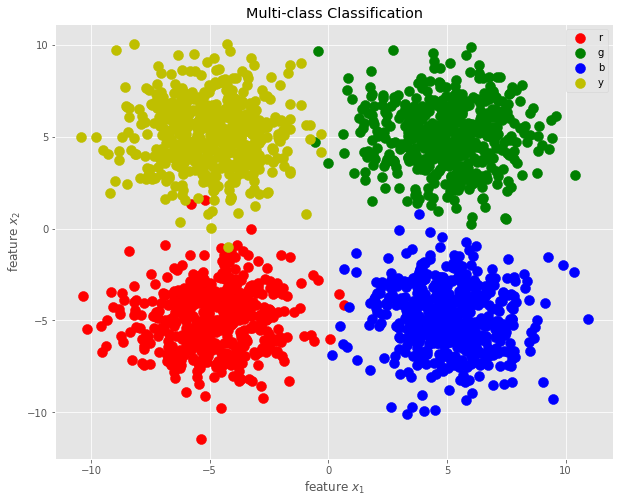

In [6]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples//4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples//4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))


In [0]:
import randomForest as rf

In [0]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random')

In [9]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [10]:
#%debug
rfc.train(X,Y)


Building Classifier

Creating tree # 1
Creating Left Child Node With 436 Examples, and Right Node with 1564 Examples
Creating Left Child Node With 222 Examples, and Right Node with 214 Examples
Creating Child Node With ClassLabel=1.0, nexamples=222, classes=[(1.0, 1.0)]
Creating Left Child Node With 214 Examples, and Right Node with 0 Examples
Creating Left Child Node With 0 Examples, and Right Node with 214 Examples
Creating Child Node With ClassLabel=4.0, nexamples=214, classes=[(4.0, 0.9953271028037384), (1.0, 0.004672897196261682)]
Creating Left Child Node With 565 Examples, and Right Node with 999 Examples
Creating Left Child Node With 276 Examples, and Right Node with 289 Examples
Creating Left Child Node With 0 Examples, and Right Node with 276 Examples
Creating Child Node With ClassLabel=1.0, nexamples=276, classes=[(1.0, 0.9927536231884058), (4.0, 0.007246376811594203)]
Creating Left Child Node With 289 Examples, and Right Node with 0 Examples
Creating Child Node With ClassLa

In [11]:
len(rfc.trees)

10

In [12]:
# Training Confusion Matrix...
# %pdb

Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,496,0,2,2,500
2.0,0,497,0,3,500
3.0,0,1,499,0,500
4.0,2,0,0,498,500
All,498,498,501,503,2000


In [13]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Yp))
tlabels = pd.Series(np.squeeze(Y))
acc = np.sum(tlabels == plabels) / len(Y)
print(acc)
assert_greater_equal(acc, 0.78)

0.995


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

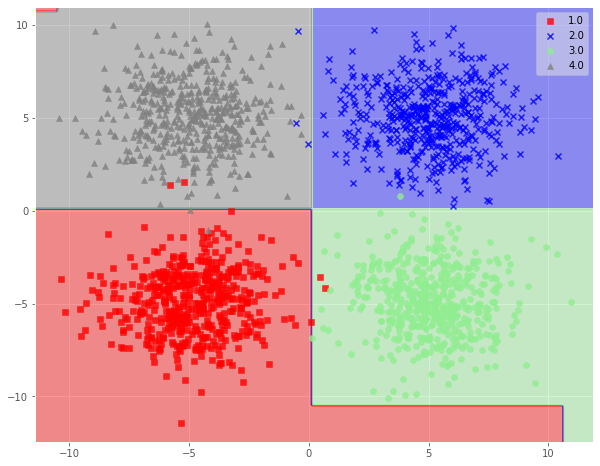

In [14]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-raa-10trees.svg',format='svg')

In [15]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Yt.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(1000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,250,0,0,0,250
2.0,0,249,0,1,250
3.0,3,1,246,0,250
4.0,1,0,0,249,250
All,254,250,246,250,1000


In [16]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Ypt))
tlabels = pd.Series(np.squeeze(Yt))
acc = np.sum(tlabels == plabels) / len(Yt)
print(acc)
assert_greater_equal(acc, 0.78)

0.994


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

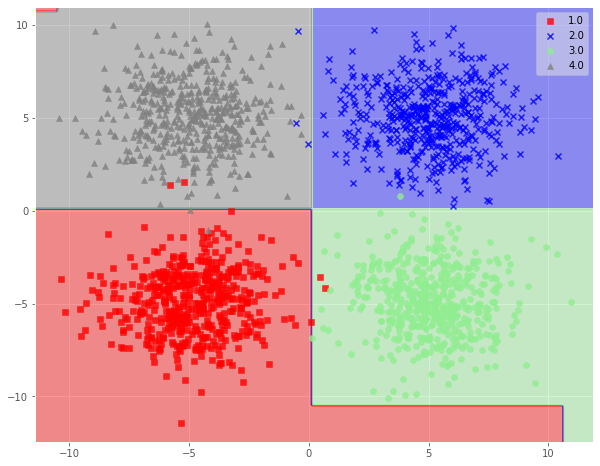

In [17]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


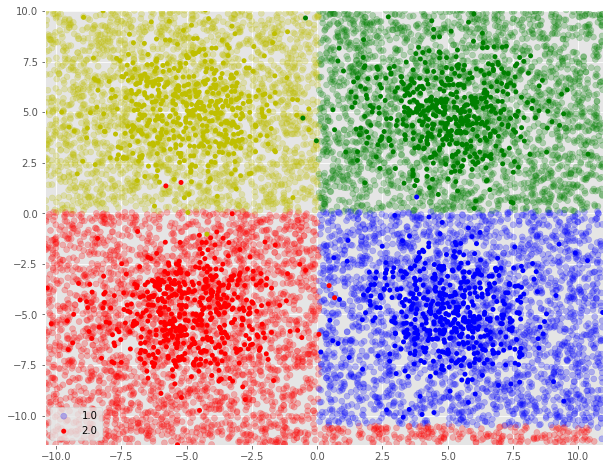

In [18]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout>

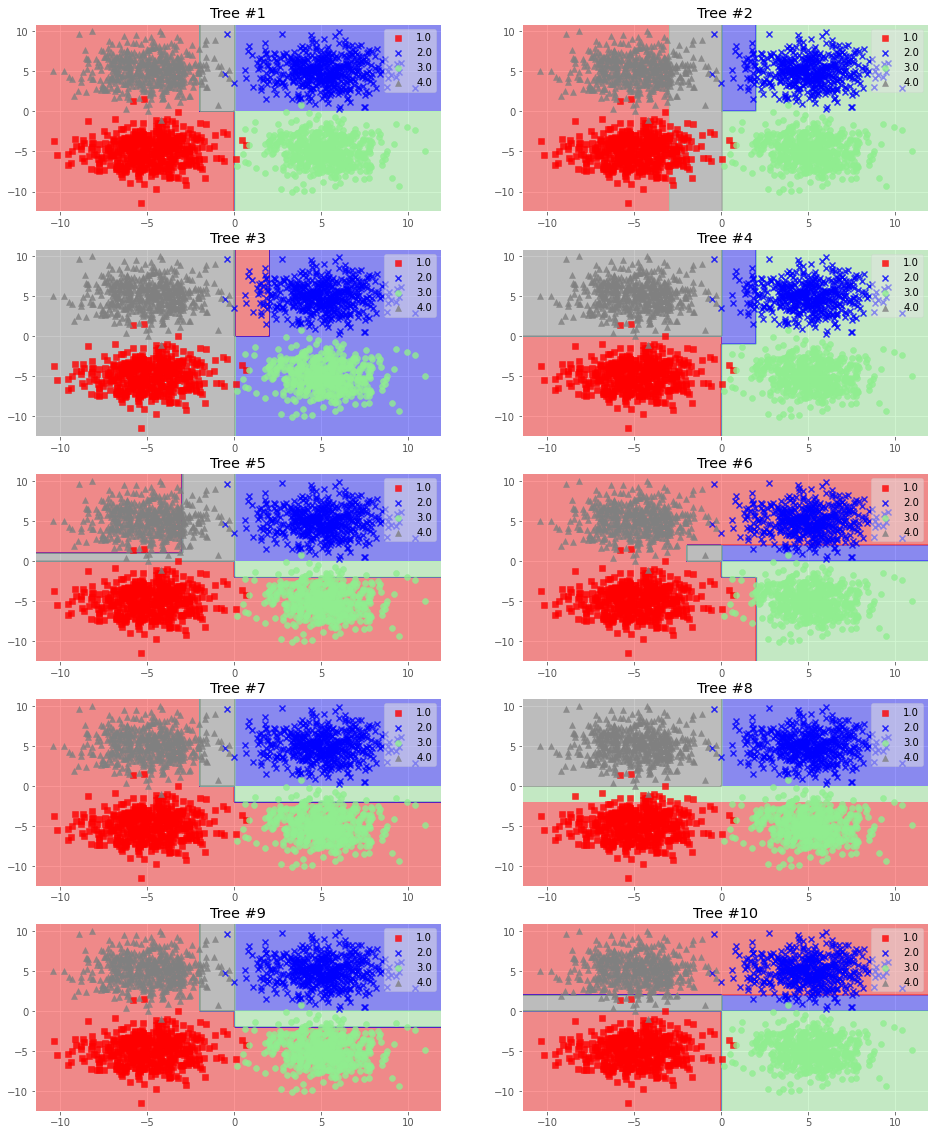

In [19]:
ntrees=rfc.ntrees
nrows = int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

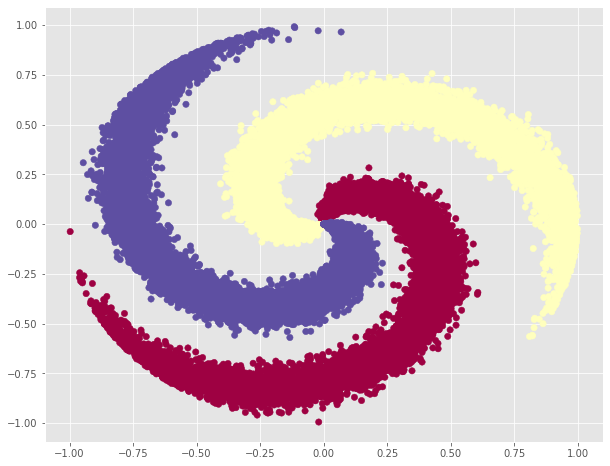

In [20]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

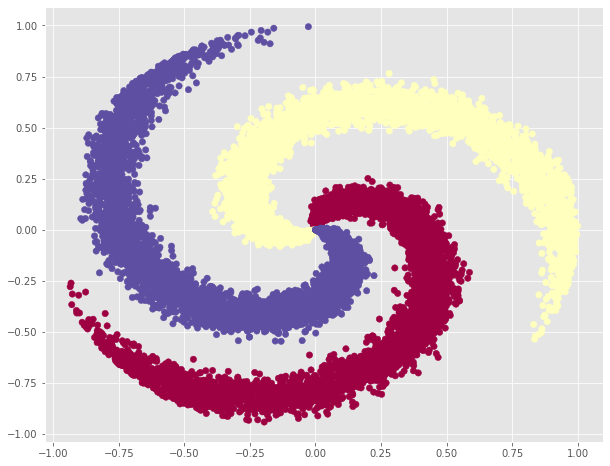

In [21]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [22]:
rfc=rf.RandomForest(weaklearner='Axis-Aligned-Random',usebagging=False)
rfc.train(X,Y)


Building Classifier

Creating tree # 1
Creating Left Child Node With 13664 Examples, and Right Node with 16336 Examples
Creating Left Child Node With 11651 Examples, and Right Node with 2013 Examples
Creating Left Child Node With 4489 Examples, and Right Node with 7162 Examples
Creating Left Child Node With 549 Examples, and Right Node with 3940 Examples
Creating Child Node With ClassLabel=0, nexamples=549, classes=[(0, 1.0)]
Creating Child Node With ClassLabel=0, nexamples=3940, classes=[(0, 0.8324873096446701), (2, 0.16751269035532995)]
Creating Left Child Node With 0 Examples, and Right Node with 7162 Examples
Creating Child Node With ClassLabel=2, nexamples=7162, classes=[(2, 0.8371963138788048), (1, 0.09522479754258587), (0, 0.06757888857860933)]
Creating Left Child Node With 1610 Examples, and Right Node with 403 Examples
Creating Left Child Node With 1610 Examples, and Right Node with 0 Examples
Creating Child Node With ClassLabel=0, nexamples=1610, classes=[(0, 0.9993788819875

In [23]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9330,208,462,10000
1,594,8724,682,10000
2,1392,99,8509,10000
All,11316,9031,9653,30000


In [24]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Yp))
tlabels = pd.Series(np.squeeze(Y))
acc = np.sum(tlabels == plabels) / len(Y)
print(acc)
assert_greater_equal(acc, 0.78)

0.8854333333333333


In [25]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Ytest.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(15000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4700,107,193,5000
1,294,4382,324,5000
2,680,49,4271,5000
All,5674,4538,4788,15000


In [26]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Ypt))
tlabels = pd.Series(np.squeeze(Ytest))
acc = np.sum(tlabels == plabels) / len(Ytest)
print(acc)
assert_greater_equal(acc, 0.78)

0.8902


(10000, 2)
[0, 1, 2]


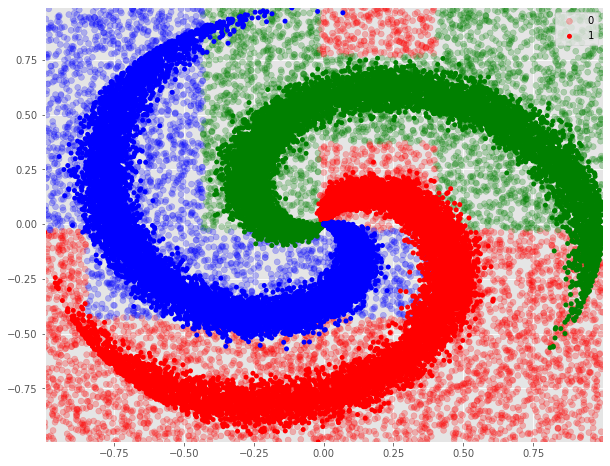

In [27]:
t.plot_points_range(rfc,X,Y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


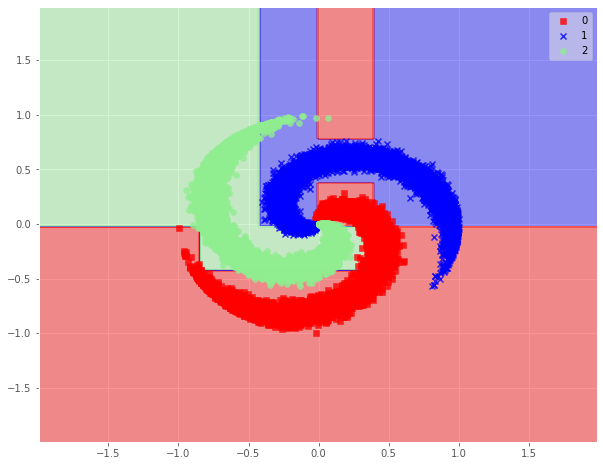

In [28]:
t.plot_decision_regions(X,Y,rfc)

### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout>

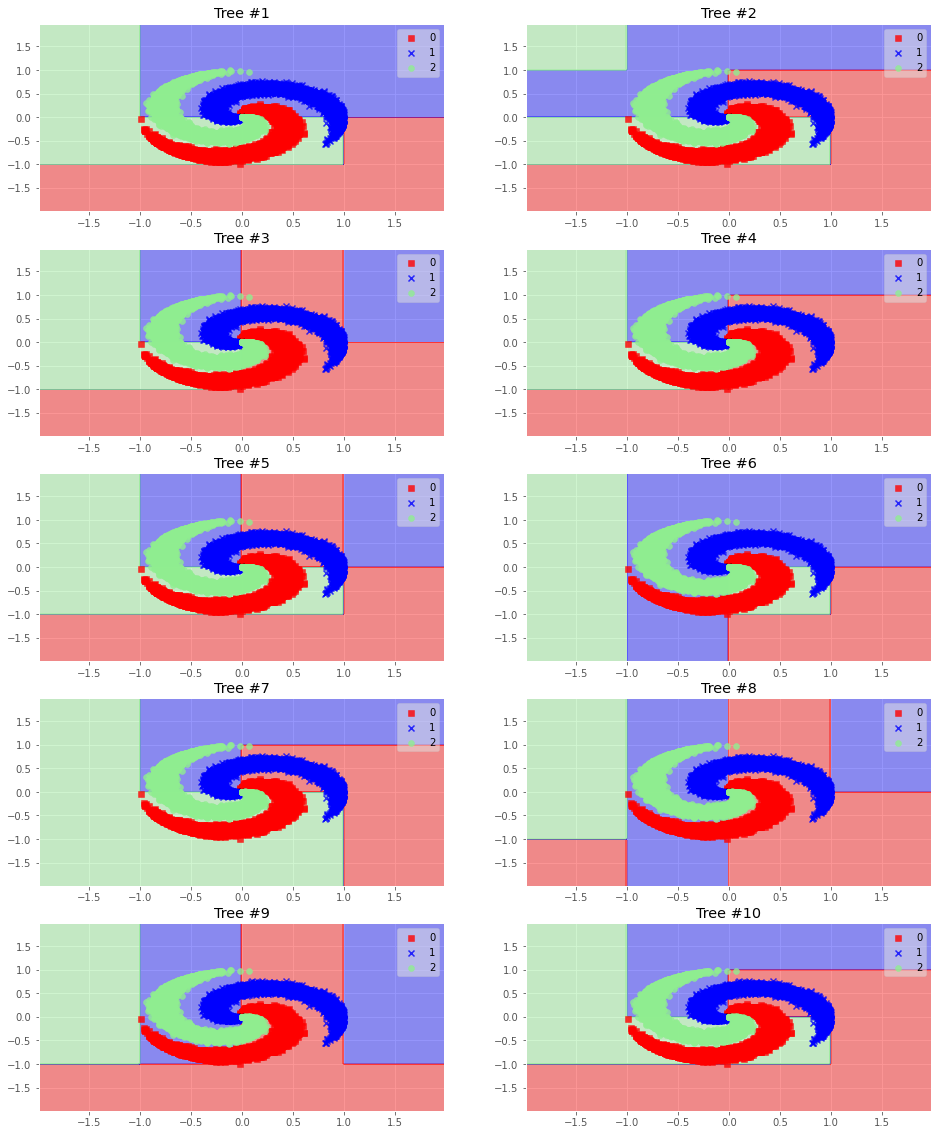

In [29]:
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [0]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, V_train, Y_train, V_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape, V_train.shape, Y_train.shape, V_test.shape)

(24000, 2) (6000, 2) (24000,) (6000,)


In [32]:

rfc = rf.RandomForest(weaklearner="Axis-Aligned-Random", usebagging= True)
rfc.train(X_train,Y_train, V_train, V_test)
# rfc.train(X_train,Y_train)


Creating Classifier with 10 trees.
Accuracy of Classifier with 10 trees is 80.81666666666666.
Creating Classifier with 12 trees.
Accuracy of Classifier with 12 trees is 84.65.
Creating Classifier with 14 trees.
Accuracy of Classifier with 14 trees is 89.23333333333333.
Creating Classifier with 16 trees.
Accuracy of Classifier with 16 trees is 89.25.
Creating Classifier with 18 trees.
Accuracy of Classifier with 18 trees is 87.98333333333333.
Creating Classifier with 20 trees.
Accuracy of Classifier with 20 trees is 87.66666666666667.
Creating Classifier with 22 trees.
Accuracy of Classifier with 22 trees is 87.66666666666667.
Creating Classifier with 24 trees.
Accuracy of Classifier with 24 trees is 89.23333333333333.
Creating Classifier with 26 trees.
Accuracy of Classifier with 26 trees is 87.7.
Creating Classifier with 28 trees.
Accuracy of Classifier with 28 trees is 88.94999999999999.
Creating Classifier with 30 trees.
Accuracy of Classifier with 30 trees is 87.94999999999999.
Val